<a href="https://colab.research.google.com/github/srinugsr2020/Srini-Repository/blob/master/Classification_ml3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
random_state = check_random_state(0)
#permutation = random_state.permutation(X.shape[0])


In [4]:
X.shape[0]

70000

70000

In [5]:
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
print(X[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  89.
 147. 147. 249. 230.  59.   2.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  15. 160. 249.
 254. 254. 254. 254. 254. 122.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   8. 188. 254. 254.
 254. 250. 147. 166. 253. 251. 120.   0.   0.   0.   0.   0.   0.   0.
   0. 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000)

In [7]:
X_train.shape

(60000, 784)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
pre_process_pipeline = Pipeline([
                                 ('imputer',SimpleImputer(strategy='median')),
                                  ('scalar',StandardScaler())
])
X_train_tr = pre_process_pipeline.fit_transform(X_train)

In [9]:
X_train_tr[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -4.08251693e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -6.22758214e-03, -9.25077752e-03, -1.18716812e-02,
       -1.43115977e-02, -1.84631066e-02, -2.44872515e-02, -3.03733260e-02,
       -3.20306274e-02, -3.19532547e-02, -3.22021520e-02, -3.10156728e-02,
       -2.99569742e-02, -2.76003996e-02, -2.32470241e-02, -1.92325671e-02,
       -1.65457690e-02, -1.09292759e-02, -8.32486080e-03, -4.38069356e-03,
        0.00000000e+00,  

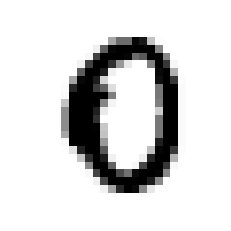

In [10]:
import matplotlib.pyplot as plt
some_image = X[0]
some_image_reshape = some_image.reshape(28,28)
plt.imshow(some_image_reshape,cmap='binary')
plt.axis('off')
plt.show()

In [11]:
y[0]

'0'

In [0]:
import numpy as np
y_train = y_train.astype(np.uint64)

In [0]:
y_train_5 = (y_train==5)
y_test_5 = (y_test.astype(np.uint64)==5)

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_tr,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([some_image])

array([False])

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
strt_fold = StratifiedKFold(random_state=42,n_splits=3)
for train_index,test_index in strt_fold.split(X_train_tr,y_train_5):
  X_train_str = X_train_tr[train_index]
  y_train_str = y_train_5[train_index]
  X_test_str = X_train_tr[test_index]
  y_test_str = y_train_5[test_index]
  #clone_sgd = clone(sgd_clf)
  sgd_clf.fit(X_train_str,y_train_str)
  predictions=sgd_clf.predict(X_test_str)
  avg = sum(predictions==y_test_str)/len(y_test_str)
  print(avg)

0.9716014199290035
0.9685
0.9684484224211211


In [17]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(sgd_clf,X_train_tr,y_train_5,cv=5,scoring='accuracy')
print(cross_val)

[0.9728356  0.96866667 0.9695     0.97008333 0.96966414]


In [0]:
from sklearn.model_selection import cross_val_predict
cross_pred = cross_val_predict(sgd_clf,X_train_tr,y_train_5,cv=5)

In [19]:
print(cross_pred)

[False False False ... False False False]


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,cross_pred)

array([[53990,   606],
       [ 1192,  4212]])

In [21]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,cross_pred)

0.8742216687422167

In [22]:
recall_score(y_train_5,cross_pred)

0.7794226498889711

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_5,cross_pred)

0.8241048718450401

In [0]:
decision_score = cross_val_predict(sgd_clf,X_train_tr,y_train_5,cv=5,method="decision_function")
from sklearn.metrics import precision_recall_curve


In [25]:
print(decision_score)

[-1042.23828738  -475.40464727   -71.11331636 ...  -576.27987384
  -381.16164578 -1979.14795099]


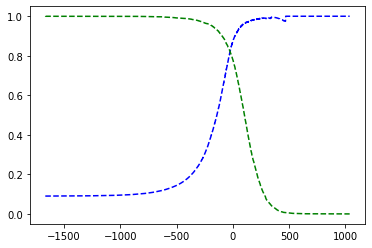

In [26]:
precisions,recalls,thresholds = precision_recall_curve(y_train_5,decision_score)
plt.plot(thresholds,precisions[:-1],"b--",label="precisions")
plt.plot(thresholds,recalls[:-1],"g--",label="recall")
plt.show()

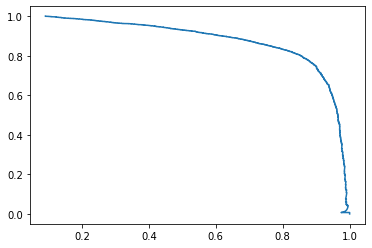

In [27]:
plt.plot(precisions,recalls)
plt.show()

In [28]:
print(recalls)

[1.00000000e+00 9.99814952e-01 9.99814952e-01 ... 3.70096225e-04
 1.85048113e-04 0.00000000e+00]


In [29]:
print(precisions)

[0.09048137 0.09046614 0.09046766 ... 1.         1.         1.        ]


In [0]:
threshold_90 = thresholds[np.argmax(precisions >= 0.9)]

In [31]:
print(threshold_90)

16.028572670614665


In [32]:
decision_score_pred = (decision_score >= threshold_90)
confusion_matrix(y_train_5,decision_score_pred)

array([[54149,   447],
       [ 1375,  4029]])

In [33]:
precision_score(y_train_5,decision_score_pred)

0.9001340482573726

In [34]:
recall_score(y_train_5,decision_score_pred)

0.7455588452997779

In [35]:
f1_score(y_train_5,decision_score_pred)

0.815587044534413

In [0]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,decision_score)

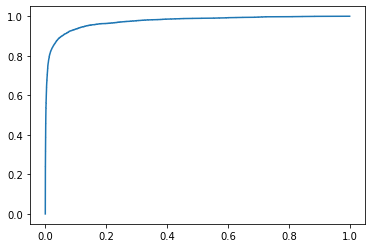

In [37]:
plt.plot(fpr,tpr)

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,decision_score)

0.973526867077022

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(random_state=4)
rand_clf_scores = cross_val_predict(random_clf,X_train_tr,y_train_5,cv=5,method="predict_proba")
print(rand_clf_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[[1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 ...
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]]


In [0]:
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,rand_clf_scores[:,1])

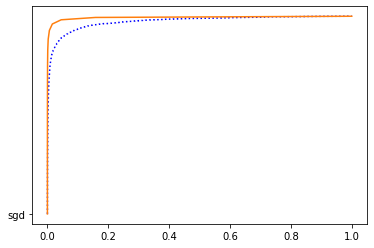

In [41]:
plt.plot(fpr,tpr,"b:","sgd")
plt.plot(fpr_forest,tpr_forest,label="random")
plt.show()

In [42]:
roc_auc_score(y_train_5,rand_clf_scores[:,1])

0.9938294643287597

In [43]:
f1_score(y_train_5,rand_clf_scores[:,1]>=0.5)

0.9256854955915123

In [44]:
confusion_matrix(y_train_5,rand_clf_scores[:,1]>=0.5)

array([[54456,   140],
       [  627,  4777]])

In [45]:
precision_score(y_train_5,rand_clf_scores[:,1]>=0.5)

0.9715273540776896

In [46]:
y_train_pred_forest = cross_val_predict(random_clf,X_train_tr,y_train_5,cv=5)
precision_score(y_train_5,y_train_pred_forest)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

0.9867957746478874

In [47]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train_tr,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
svc_clf.predict([some_image])

array([7], dtype=uint64)

In [0]:
some_digit_pred = svc_clf.decision_function([some_image])

In [50]:
np.argmax(some_digit_pred)

7

In [51]:
svc_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint64)

In [52]:
y_train[0]

2

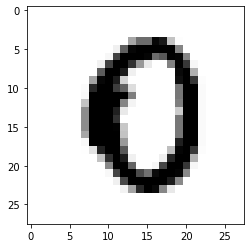

In [53]:
plt.imshow(some_image.reshape(28,28),cmap="binary")

In [54]:
sgd_clf.fit(X_train_tr,y_train)
sgd_clf.predict([some_digit])

NameError: ignored